In [9]:
import matplotlib.pyplot as plt
import numpy as np
from perlin_noise import PerlinNoise
from scipy.integrate import solve_ivp

In [10]:
global Scale,AbunMatrix,Eta,Connec,Kappa,Abun0,mu0,mu1,D

In [11]:
def Arr2Posi(num,y):
    a=np.mod(y,num)
    b=int((y-a)/num)
    return [a,b]

In [12]:
def Posi2Arr(num,a,b):
    return a+b*num

In [13]:
def Dis(num,x,index):
    y=np.zeros(len(x))
    AA=Arr2Posi(num,index)
    for i in range(len(x)):
        BB=Arr2Posi(num,x[i])
        y[i]=np.sqrt((AA[0]-BB[0])**2+(AA[1]-BB[1])**2)
    return y

In [14]:
def Nearby(num,y):
    A=[]
    [a,b]=Arr2Posi(num,y)
    if a>0:
        A.append(Posi2Arr(num,a-1,b))
    if a<num-1:
        A.append(Posi2Arr(num,a+1,b))
    if b>0:
        A.append(Posi2Arr(num,a,b-1))
    if b<num-1:
        A.append(Posi2Arr(num,a,b+1))
    return A

In [15]:
def ARG_Move(t,y):
    dydt=np.zeros((Scale**2)*2)
    for i in range(Scale**2):
        aa=Arr2Posi(Scale,i)
        bb=Nearby(Scale,i)
        ss0=0
        ss1=0
        for j in range(len(bb)):
            ss0=ss0+y[bb[j]]
            ss1=ss1+y[bb[j]+Scale**2]
        if AbunMatrix[aa[0],aa[1]]==0:
            dydt[i]=0
            dydt[i+Scale**2]=0
        else:
            dydt[i]=mu0*y[i]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])-Eta*y[i]*(y[i+Scale**2]+Connec*ss1)+Kappa*y[i+Scale**2]-D*y[i]
            dydt[i+Scale**2]=mu1*y[i+Scale**2]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])+Eta*y[i]*(y[i+Scale**2]+Connec*ss1)-Kappa*y[i+Scale**2]-D*y[i+Scale**2]
    return dydt

In [16]:
Scale=101
num=100
Etas=0.01+0.09*np.random.rand(num)
Kappas=0.01+0.01*np.random.rand(num)
mu1s=0.3+0.2*np.random.rand(num)
Ds=0.01+0.04*np.random.rand(num)

Connec=0.04
Abun0=0.01
mu0=0.5

Center=int((Scale-1)/2)
timespan=np.arange(0,300,1)

TIME=np.zeros((len(Etas),len(timespan)))
RRR=np.zeros((len(Etas),len(timespan)))
BBB=np.zeros((len(Etas),len(timespan)))
FFF=np.zeros((len(Etas),len(timespan)))

for qwe in range(num):
    print(qwe)
    Eta=Etas[qwe]
    Kappa=Kappas[qwe]
    mu1=mu1s[qwe]
    D=Ds[qwe]

    noise = PerlinNoise(octaves=5, seed=3)
    xpix, ypix = Scale, Scale
    pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]
    land=(np.abs(pic))**1
    land=0.001+(land-np.min(land))/(np.max(land)-np.min(land))*0.999
    #xxxx=np.min(land[np.nonzero(land)])
    #for fgh in range(Scale):
    #    for jkl in range(Scale):
    #        if land[fgh,jkl]==0:
    #            land[fgh,jkl]=xxxx
    AbunMatrix=land/np.sum(land)*Scale**2
    land_p=[]
    for x in AbunMatrix.flatten():
        if x>0:
            land_p.append(x)
    temp=land_p/sum(land_p)

    InitialM=np.zeros((Scale,Scale))
    InitialM[Center,Center]=Abun0*AbunMatrix[Center,Center]
    Initial=np.concatenate((AbunMatrix.flatten(),InitialM.flatten()),axis=0)
    sol=solve_ivp(ARG_Move,[0,max(timespan)],Initial,method='RK23',t_eval=timespan)
    y1=sol.y
    t1=sol.t
    
    thresh=0.01
    CenterArr=Posi2Arr(Scale,Center,Center)
    for j in range(len(t1)):
        tpoint=j
        TIME[qwe,j]=t1[j]
        Plasmid=y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint]
        #Plasmid=np.divide(y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint],y1[np.arange(0,(Scale**2),1),tpoint]+y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint])
        Index=[]
        for i in range(len(Plasmid)):
            aa=Arr2Posi(Scale,i)
            if AbunMatrix[aa[0],aa[1]]>0 and Plasmid[i]/AbunMatrix[aa[0],aa[1]]>thresh:
                Index.append(i)
        if len(Index)>0:
            RRR[qwe,j]=np.max(Dis(Scale,Index,CenterArr))
        else:
            RRR[qwe,j]=0
        BBB[qwe,j]=np.mean(y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint])/(np.mean(y1[np.arange(0,Scale**2,1),tpoint])+np.mean(y1[np.arange(Scale**2,(Scale**2)*2,1),tpoint]))
        FFF[qwe,j]=len(Index)/(Scale**2)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


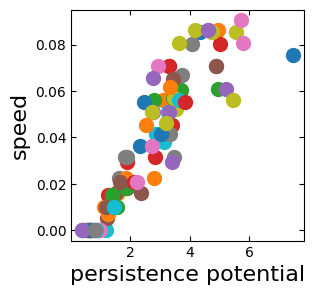

In [17]:
SPEED=np.zeros(num)
OMEGA=np.zeros(num)
plt.figure(figsize=(3,3))
for i in range(num):
    pin=np.size(TIME,1)
    for j in np.arange(1,np.size(TIME,1),1):
        if TIME[i,j]==0:
            pin=j
            break
    z=np.polyfit(TIME[i,range(max(20,min(pin,200)))],RRR[i,range(max(20,min(pin,200)))],1)
    xcd=RRR[i,max(20,min(pin,200))]/TIME[i,max(20,min(pin,200))]
    SPEED[i]=xcd#z[0]
    OMEGA[i]=Etas[i]/(Ds[i]+Kappas[i]-Ds[i]/(mu0/mu1s[i]))
    plt.plot(OMEGA[i],SPEED[i],'.',markersize=20)
plt.xlabel('persistence potential',fontsize=16)
plt.ylabel('speed',fontsize=16)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('PersistencePotentialSpeed_1.pdf')
plt.show()

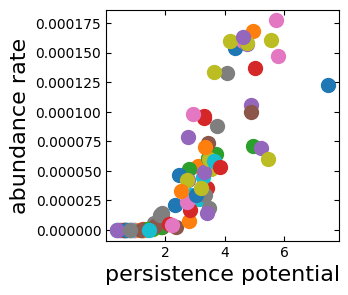

In [18]:
SPEEDAB=np.zeros(num)
OMEGA=np.zeros(num)
plt.figure(figsize=(3,3))
for i in range(num):
    pin=np.size(TIME,1)
    for j in np.arange(1,np.size(TIME,1),1):
        if TIME[i,j]==0:
            pin=j
            break
    z=np.polyfit(TIME[i,range(max(20,min(pin,200)))],BBB[i,range(max(20,min(pin,200)))],1)
    xcd=BBB[i,max(20,min(pin,200))]/TIME[i,max(20,min(pin,200))]
    SPEEDAB[i]=xcd#z[0]
    OMEGA[i]=Etas[i]/(Ds[i]+Kappas[i]-Ds[i]/(mu0/mu1s[i]))
    plt.plot(OMEGA[i],SPEEDAB[i],'.',markersize=20)
plt.xlabel('persistence potential',fontsize=16)
plt.ylabel('abundance rate',fontsize=16)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('PersistencePotentialSpeed_2.pdf')
plt.show()

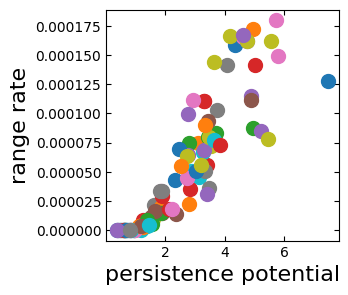

In [19]:
SPEEDFF=np.zeros(num)
OMEGA=np.zeros(num)
plt.figure(figsize=(3,3))
for i in range(num):
    pin=np.size(TIME,1)
    for j in np.arange(1,np.size(TIME,1),1):
        if TIME[i,j]==0:
            pin=j
            break
    z=np.polyfit(TIME[i,range(max(20,min(pin,200)))],FFF[i,range(max(20,min(pin,200)))],1)
    xcd=FFF[i,max(20,min(pin,200))]/TIME[i,max(20,min(pin,200))]
    SPEEDFF[i]=xcd#z[0]
    OMEGA[i]=Etas[i]/(Ds[i]+Kappas[i]-Ds[i]/(mu0/mu1s[i]))
    plt.plot(OMEGA[i],SPEEDFF[i],'.',markersize=20)
plt.xlabel('persistence potential',fontsize=16)
plt.ylabel('range rate',fontsize=16)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('PersistencePotentialSpeed_3.pdf')
plt.show()